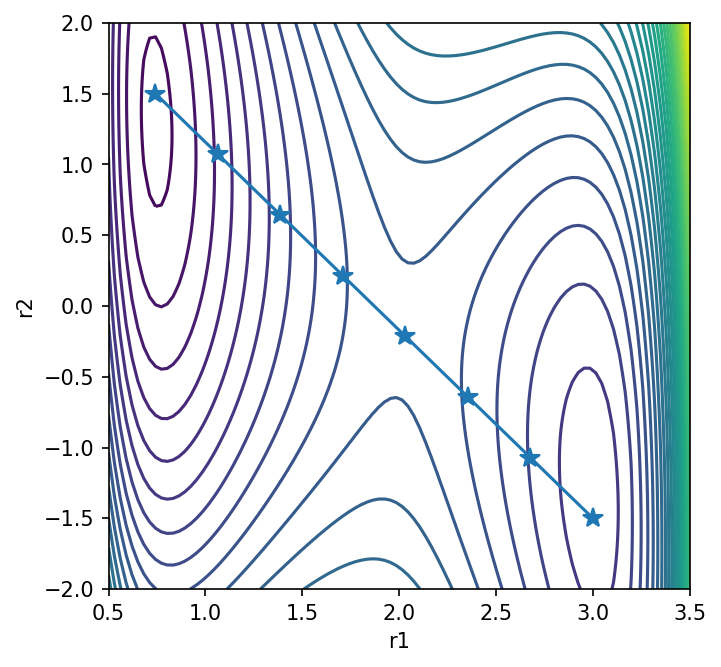

<Figure size 432x288 with 0 Axes>

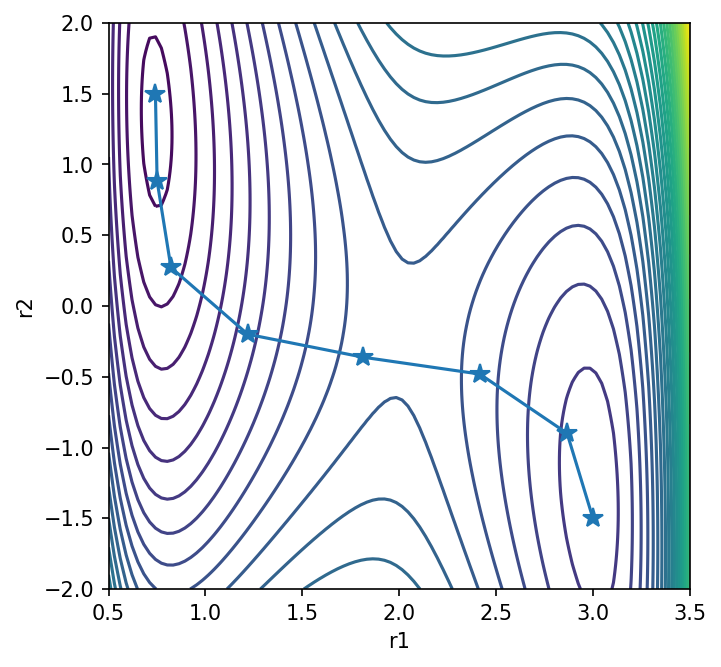

<Figure size 432x288 with 0 Axes>

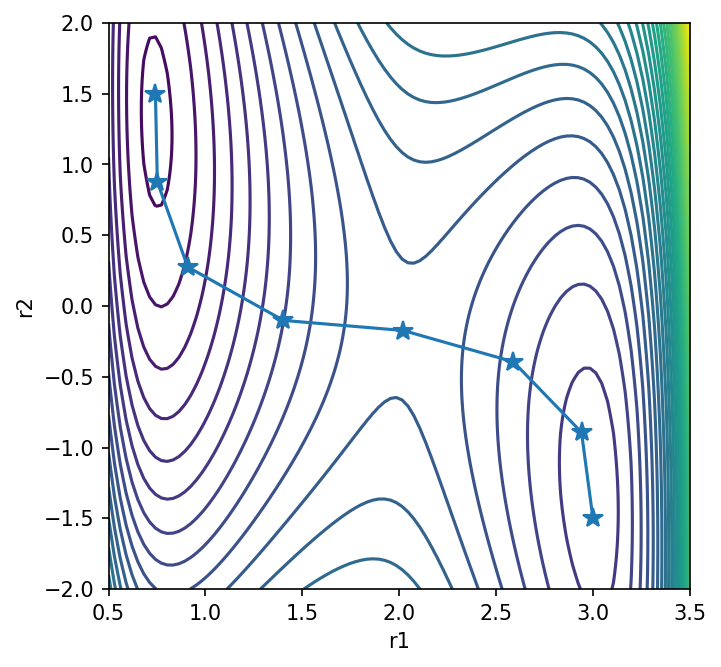

<Figure size 432x288 with 0 Axes>

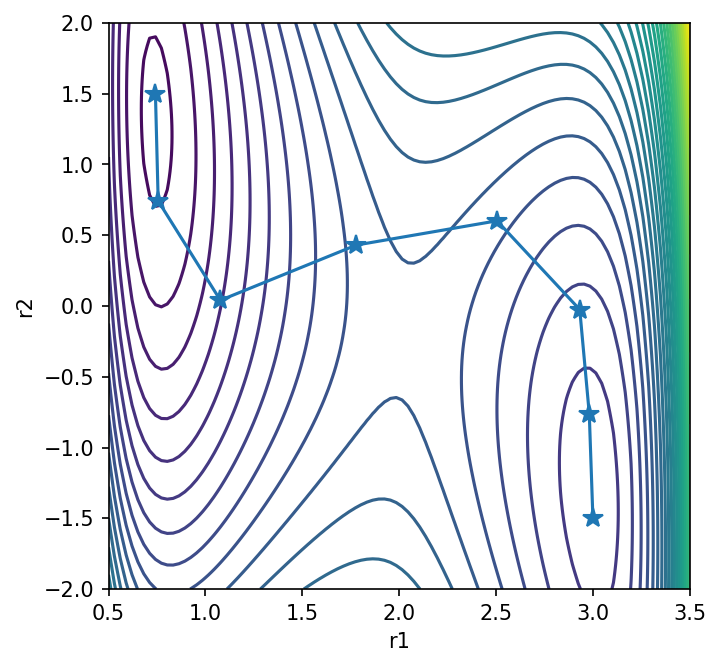

<Figure size 432x288 with 0 Axes>

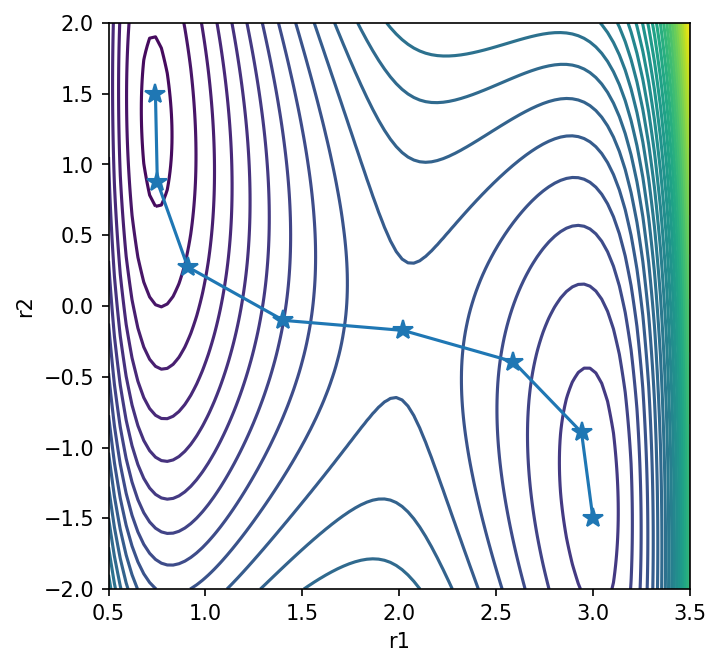

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Qfun(r, d):
    r0 = 0.742
    a = 1.942
    y = d/2.0*(1.5*np.exp(-2.0*a*(r-r0))-np.exp(-1.0*a*(r-r0)))
    return y


def Jfun(r, d):
    r0 = 0.742
    a = 1.942
    y = d/4.0*(np.exp(-2.0*a*(r-r0))-6.0*np.exp(-1.0*a*(r-r0)))
    return y


def LEPSPotfun(r1, r2):
    r3 = r1 + r2
    a = 0.05
    b = 0.80
    c = 0.05
    d1 = 4.746
    d2 = 4.746
    d3 = 3.445
    V1 = Qfun(r1, d1)/(1+a) + Qfun(r2, d2)/(1+b) + Qfun(r3, d3)/(1+c) 
    V2 = Jfun(r1, d1)*Jfun(r1, d1)/(1+a)/(1+a) + Jfun(r2, d2)*Jfun(r2, d2)/(1+b)/(1+b) + Jfun(r3, d3)*Jfun(r3, d3)/(1+c)/(1+c) - Jfun(r1, d1)*Jfun(r2, d2)/(1+a)/(1+b) - Jfun(r2, d2)*Jfun(r3, d3)/(1+b)/(1+c) - Jfun(r1, d1)*Jfun(r3, d3)/(1+a)/(1+c)
    V = V1 - np.sqrt(V2)
    return V


def LEPSHarmOsciPot(r1, x):
    r2 = 3.742
    kc = 0.2025
    c = 1.154
    V = LEPSPotfun(r1, r2-r1) + 2.0*kc*(r1-(r2/2.0-x/c))**2
    return V


def pltLEPSConter(mat_seq, filename):
    r1 = np.linspace(0.5, 3.5, 100)
    r2 = np.linspace(-2.0, 2.0, 100)
    R1, R2 = np.meshgrid(r1, r2)
    plt.figure(figsize=(5,5), dpi=150)
    plt.xlabel("r1")
    plt.ylabel("r2")
    plt.xlim(0.5,3.5)
    plt.ylim(-2.0,2.0)
    my_leps = plt.contour(R1, R2, LEPSHarmOsciPot(R1, R2), 40)
    plt.plot(mat_seq[:,0], mat_seq[:,1], marker='*', ms=10, label="a")
    #plt.clabel(my_leps, inline=True, fontsize=10)
    plt.show()
    my_figure = plt.gcf()
    my_figure.savefig(filename)
    my_figure.clear()


def pltEnergyCurve(Img_seq, filename):
    img_count = Img_seq.shape[0]
    ls_x = []
    ls_y = []
    for i in range(img_count):
        ls_x.append(i)
        temp_y = LEPSHarmOsciPot(Img_seq[i][0], Img_seq[i][1])
        ls_y.append(temp_y)
    plt.figure(figsize=(5,5), dpi=150)
    plt.xlabel("img_index")
    plt.ylabel("potential energy")
    plt.plot(ls_x, ls_y, marker="*", ms=10)
    plt.show()
    plt.savefig(filename)
    
    

def GetDistanceof2Img(Img1, Img2):
    ### 获取两个图象之间的直线距离
    mat_rlt = Img2 - Img1
    img_len = np.linalg.norm(mat_rlt)
    return img_len


def GetImgSeq(img_count, img_start, img_end):
    ### 根据初始输入的图象生成图象序列
    ls_rlt = []
    ls_x = np.linspace(img_start[0], img_end[0], img_count)
    ls_y = np.linspace(img_start[1], img_end[1], img_count)
    for i in range(img_count):
        img_point = np.array([ls_x[i], ls_y[i]])
        ls_rlt.append(img_point)
    mat_rlt = np.array(ls_rlt)
    return mat_rlt


def GetSpringForceOf2Img(Img1, Img2, k):
    ### 获取图象2对图象1的弹簧力，Img为图象坐标，k为弹簧系数（由图象1指向图象2），l0为弹簧原长
    vec_img = Img2 - Img1
    mat_f = k*vec_img
    return mat_f


def GetSpringForceOfImage(Img_b, Img, Img_p, k1, k2):
    ### 获取某个图象上的弹簧力，Img_b指的-1个图象，Img_p值得+1个图象，k弹簧系数，l弹簧原长
    Fb = GetSpringForceOf2Img(Img_b, Img, k1)
    Fp = GetSpringForceOf2Img(Img, Img_p, k2)
    F_total = Fp - Fb
    return F_total


def GetSpringOriLength(Img_seq):
    ### 根据传入的图象列表获取弹簧原长,原长度指的是当前弹簧和其前一个弹簧
    img_count = Img_seq.shape[0]
    ls_l_rlt = []
    for i in range(img_count):
        if i == 0:
            l0 = 0.0
        else:
            vec_img = Img_seq[i] - Img_seq[i-1]
            l0 = np.linalg.norm(vec_img)
        ls_l_rlt.append(l0)
    mat_l = np.array(ls_l_rlt)
    return mat_l


def GetSpringK(Img_seq, spring_k):
    ### 定义每条弹簧的弹性系数
    const_k = spring_k
    img_count = Img_seq.shape[0]
    ls_k = []
    for i in range(img_count):
        if i == 0:
            k=0.0
        else:
            k=const_k
        ls_k.append(k)
    mat_k = np.array(ls_k)
    return mat_k
     

def GetInitVelocity(img_seq):
    ### 获取初始的速度列表
    img_count = img_seq.shape[0]
    ls_v = []
    for i in range(img_count):
        ls_v.append([0.0, 0.0])
    mat_v = np.array(ls_v)
    return mat_v


def GetPotForceOf2Img(Img):
    ### 根据图象位置在势能面上获取图象的梯度
    delta_x = 1e-8
    delta_y = 1e-8
    x0 = Img[0]
    y0 = Img[1]
    xp = x0 + delta_x
    xb = x0 - delta_x
    yp = y0 + delta_y
    yb = y0 - delta_y
    grad_x = (LEPSHarmOsciPot(xp, y0)-LEPSHarmOsciPot(xb, y0))/(2.0*delta_x)
    grad_y = (LEPSHarmOsciPot(x0, yp)-LEPSHarmOsciPot(x0, yb))/(2.0*delta_y)
    mat_grad_f = -1.0*np.array([grad_x, grad_y])
    return mat_grad_f


def GetForceList(Img_seq, k_seq):
    ### 根据图象列表获取图象的受力和加速度,Img_sep是图象列表，l0_sep是原长列表, k_seq是弹簧劲度系数列表, mass_seq是每个点的质量
    img_count = Img_seq.shape[0]
    ls_F_result = []
    for i in range(img_count):
        if i==0 or i==(img_count-1):
            F_spr = 0.0
            F_pot = 0.0
            F_tot = 0.0
        else:
            k1 = k_seq[i]
            k2 = k_seq[i+1]
            F_spr = GetSpringForceOfImage(Img_seq[i-1], Img_seq[i], Img_seq[i+1], k1, k2)
            F_pot = GetPotForceOf2Img(Img_seq[i])
            F_tot = F_spr + F_pot
        F_dict = dict(img=Img_seq[i], F_spring=F_spr, F_poten=F_pot, F_total=F_tot)
        ls_F_result.append(F_dict)
    return ls_F_result


def GetNebForceList(Img_seq, k_seq):
    ### 根据图象列表获取neb下图象的受力和加速度,Img_sep是图象列表,k_seq是弹簧劲度系数列表
    img_count = Img_seq.shape[0]
    ls_F_result = []
    for i in range(img_count):
        if i==0 or i==(img_count-1):
            F_spr = 0.0
            F_pot = 0.0
            F_tot = 0.0
        else:
            delta_R = Img_seq[i+1] - Img_seq[i-1]
            tau_para = delta_R/np.linalg.norm(delta_R)
            k1 = k_seq[i]
            k2 = k_seq[i+1]
            F_spr = GetSpringForceOfImage(Img_seq[i-1], Img_seq[i], Img_seq[i+1], k1, k2)
            F_pot = GetPotForceOf2Img(Img_seq[i])
            F_tot = F_pot - np.dot(F_pot, tau_para)*tau_para + np.dot(F_spr, tau_para)*tau_para 
        F_dict = dict(img=Img_seq[i], F_spring=F_spr, F_poten=F_pot, F_total=F_tot)
        ls_F_result.append(F_dict)
    return ls_F_result
            

def SwitchFun(r_phi):
    if r_phi > 0.0 and r_phi < 1.0:
        y = 0.5*(1.0 + np.cos(np.pi*r_phi))
    else:
        y = 1.0
    return y

def GetFixNebForceList(Img_seq, k_seq):
    ### 根据图象列表获取neb下图象的受力和加速度,Img_sep是图象列表,k_seq是弹簧劲度系数列表
    img_count = Img_seq.shape[0]
    ls_F_result = []
    for i in range(img_count):
        if i==0 or i==(img_count-1):
            F_spr = 0.0
            F_pot = 0.0
            F_tot = 0.0
        else:
            delta_R = Img_seq[i+1] - Img_seq[i-1]
            r_phi = np.dot(Img_seq[i+1]-Img_seq[i], Img_seq[i]-Img_seq[i-1])/(np.linalg.norm(Img_seq[i+1]-Img_seq[i])*np.linalg.norm(Img_seq[i]-Img_seq[i-1]))
            fphi = SwitchFun(r_phi)
            tau_para = delta_R/np.linalg.norm(delta_R)
            k1 = k_seq[i]
            k2 = k_seq[i+1]
            F_spr = GetSpringForceOfImage(Img_seq[i-1], Img_seq[i], Img_seq[i+1], k1, k2)
            F_pot = GetPotForceOf2Img(Img_seq[i])
            F_tot = F_pot - np.dot(F_pot, tau_para)*tau_para + np.dot(F_spr, tau_para)*tau_para + fphi*(F_spr - np.dot(F_spr, tau_para)*tau_para)
        F_dict = dict(img=Img_seq[i], F_spring=F_spr, F_poten=F_pot, F_total=F_tot)
        ls_F_result.append(F_dict)
    return ls_F_result


def GetMaxEnergyImgIndex(Img_seq):
    ### 获取最高能量img的下标，下标从0开始
    img_count = Img_seq.shape[0]
    max_energy = LEPSHarmOsciPot(Img_seq[0][0], Img_seq[0][1])
    img_index = 0
    for i in range(img_count):
        pot_V = LEPSHarmOsciPot(Img_seq[i][0], Img_seq[i][1])
        if pot_V > max_energy:
            max_energy = pot_V
            img_index = i
    return img_index


def IdentifyMaxEIndex(ls_max_E_idx, Img_seq, list_length):
    ### 根据传入的队列长度决定是否定位并开启climb算法，ls_max_E_idx是储存序号的队列，list_length是要求列表的长度
    max_energy_img_idx = GetMaxEnergyImgIndex(Img_seq)
    ori_length = len(ls_max_E_idx)
    if ori_length < list_length:
        ls_max_E_idx.append(max_energy_img_idx)
        return False
    else:
        ls_max_E_idx.pop(0)
        ls_max_E_idx.append(max_energy_img_idx)
        img_idx = ls_max_E_idx[0]
        for i in range(list_length):
            if ls_max_E_idx[i] != img_idx:
                return False
        return True
            

def GetClimbFixNebForceList(Img_seq, k_seq, max_energy_index):
    ### 爬坡弹性带方法获取图象上的力，Img_seq是图象列表，k_seq是弹簧的劲度系数
    img_count = Img_seq.shape[0]
    ls_F_result = []
    for i in range(img_count):
        if i==0 or i==(img_count-1):
            F_spr = 0.0
            F_pot = 0.0
            F_tot = 0.0
        elif i==max_energy_index:
            delta_R = Img_seq[i+1] - Img_seq[i-1]
            tau_para = delta_R/np.linalg.norm(delta_R)
            F_pot = GetPotForceOf2Img(Img_seq[i])
            F_spr = 0.0
            F_tot = F_pot - 2.0*np.dot(F_pot, tau_para)*tau_para 
        else:
            delta_R = Img_seq[i+1] - Img_seq[i-1]
            r_phi = np.dot(Img_seq[i+1]-Img_seq[i], Img_seq[i]-Img_seq[i-1])/(np.linalg.norm(Img_seq[i+1]-Img_seq[i])*np.linalg.norm(Img_seq[i]-Img_seq[i-1]))
            fphi = SwitchFun(r_phi)
            tau_para = delta_R/np.linalg.norm(delta_R)
            k1 = k_seq[i]
            k2 = k_seq[i+1]
            F_spr = GetSpringForceOfImage(Img_seq[i-1], Img_seq[i], Img_seq[i+1], k1, k2)
            F_pot = GetPotForceOf2Img(Img_seq[i])
            F_tot = F_pot - np.dot(F_pot, tau_para)*tau_para + np.dot(F_spr, tau_para)*tau_para + fphi*(F_spr - np.dot(F_spr, tau_para)*tau_para)
        F_dict = dict(img=Img_seq[i], F_spring=F_spr, F_poten=F_pot, F_total=F_tot)
        ls_F_result.append(F_dict)
    return ls_F_result


def UpdateImgForce(Img_seq, k_seq):
    ### 更新力
    ls_Force = GetForceList(Img_seq, k_seq)
    img_count = len(ls_Force)
    mat_f = Img_seq.copy()
    for i in range(img_count):
        mat_f[i] = ls_Force[i]["F_total"]
    return mat_f

def UpdateNebImgForce(Img_seq, k_seq):
    ### 更新neb下的力
    ls_Force = GetNebForceList(Img_seq, k_seq)
    img_count = len(ls_Force)
    mat_f = Img_seq.copy()
    for i in range(img_count):
        mat_f[i] = ls_Force[i]["F_total"]
    return mat_f


def UpdateClNebImgForce(Img_seq, k_seq, max_energy_img_idx):
    ### 更新cl-neb下的力
    ls_Force = GetClimbFixNebForceList(Img_seq, k_seq, max_energy_img_idx)
    img_count = len(ls_Force)
    mat_f = Img_seq.copy()
    for i in range(img_count):
        mat_f[i] = ls_Force[i]["F_total"]
    return mat_f

def UpdateFixNebImgForce(Img_seq, k_seq):
    ### 更新修正neb之后的力
    ls_Force = GetFixNebForceList(Img_seq, k_seq)
    img_count = len(ls_Force)
    mat_f = Img_seq.copy()
    for i in range(img_count):
        mat_f[i] = ls_Force[i]["F_total"]
    return mat_f
        

def SteepDstMinOpt(img_seq, k_seq, alpha, mat_f):
    ### 使用Steepest descents算法优化neb过程，其中alpha是关键参数
    new_img_seq = img_seq + alpha*mat_f
    return new_img_seq


def QuickMinOpt(img_seq, mat_v, new_mat_v, mat_f, dt):
    ### 使用Quick-min算法优化neb过程，其中dt是步长参数
    atom_count = img_seq.shape[0]
    new_img_seq = img_seq.copy()
    for i in range(atom_count):
        if i == 0 or i == (atom_count-1):
            new_img_seq[i] = img_seq[i]
            new_mat_v[i] = mat_v[i]
        elif np.linalg.norm(mat_f[i]) == 0.0:
            new_img_seq[i] = img_seq[i] + dt*mat_v[i]
            new_mat_v[i] = mat_v[i]
        else:
            norm_f = mat_f[i]/np.linalg.norm(mat_f[i])
            vf_dot = np.dot(mat_v[i], norm_f)
            if vf_dot < 0.0:
                mat_v[i] = 0.0
                new_mat_v[i] = 0.0
                new_img_seq[i] = img_seq[i]
            else:
                mat_v[i] = vf_dot*norm_f
                new_img_seq[i] = img_seq[i] + mat_v[i]*dt
                new_mat_v[i] = mat_v[i] + mat_f[i]*dt
    return new_img_seq
            

def main_SteepestDescents():
    img_start = np.array([0.742, 1.5])         ### 图象起点
    img_end = np.array([3.0, -1.5])           ### 图象终点
    img_ct = 8

    img_seq = GetImgSeq(img_ct, img_start, img_end)        ###初始图象列表
    k_seq = GetSpringK(img_seq, 50.0)                      ###初始弹簧力
    mat_v = GetInitVelocity(img_seq)                       ###初始速度矩阵
    pltLEPSConter(img_seq, filename='initimg.png')          

    const_alpha = 1e-3                               ### SD中的优化参数
    new_img_seq = img_seq.copy()                    ### 新的图象列表
    N = 5000

    # 更新初始受力
    mat_f = UpdateFixNebImgForce(new_img_seq, k_seq)
    for i in range(N):
        new_img_seq = SteepDstMinOpt(img_seq, k_seq, const_alpha, mat_f)
        mat_f = UpdateFixNebImgForce(new_img_seq, k_seq)
        img_seq = new_img_seq

    pltLEPSConter(new_img_seq, "111.png")
    #pltEnergyCurve(new_img_seq, "energy.png")
    return new_img_seq


def main_SteepestDescents_clneb():
    img_start = np.array([0.742, 1.5])         ### 图象起点
    img_end = np.array([3.0, -1.5])           ### 图象终点
    img_ct = 8

    img_seq = GetImgSeq(img_ct, img_start, img_end)        ###初始图象列表
    k_seq = GetSpringK(img_seq, 50.0)                      ###初始弹簧力
    mat_v = GetInitVelocity(img_seq)                       ###初始速度矩阵
    #pltLEPSConter(img_seq, filename='initimg.png')          

    const_alpha = 1e-3                               ### SD中的优化参数
    new_img_seq = img_seq.copy()                    ### 新的图象列表
    length_max_energy_list = 10             ### 储存最大能量序号的列表的长度
    ls_max_energy_img_idx = []              ### 储存最大能量序号的列表
    N = 5000

    # 更新初始受力
    mat_f = UpdateFixNebImgForce(new_img_seq, k_seq)
    for i in range(N):
        new_img_seq = SteepDstMinOpt(img_seq, k_seq, const_alpha, mat_f)
        if IdentifyMaxEIndex(ls_max_energy_img_idx, new_img_seq, length_max_energy_list):
            max_energy_img_idx = ls_max_energy_img_idx[0]
            #print("climbing!!!")
            mat_f = UpdateClNebImgForce(new_img_seq, k_seq, max_energy_img_idx)
        else:
            #print("no climbing!!!")
            mat_f = UpdateFixNebImgForce(new_img_seq, k_seq)
        img_seq = new_img_seq

    pltLEPSConter(new_img_seq, "111.png")
    #pltEnergyCurve(new_img_seq, "energy.png")
    return new_img_seq



def main_QuickMin():
    img_start = np.array([0.742, 1.5])         ### 图象起点
    img_end = np.array([3.0, -1.5])           ### 图象终点
    img_ct = 8

    img_seq = GetImgSeq(img_ct, img_start, img_end)        ###初始图象列表
    k_seq = GetSpringK(img_seq, 50.0)                      ###初始弹簧力
    mat_v = GetInitVelocity(img_seq)                       ###初始速度矩阵
    #pltLEPSConter(img_seq, filename='initimg.png')          

    const_dt = 0.1                                  ### 单个时间步，quick-min中的优化参数
    new_img_seq = img_seq.copy()                    ### 新的图象列表
    N = 1000

    # 更新初始受力
    mat_f = UpdateNebImgForce(new_img_seq, k_seq)
    new_mat_v = mat_v.copy()
    for i in range(N):
        new_img_seq = QuickMinOpt(img_seq, mat_v, new_mat_v, mat_f, const_dt)
        mat_f = UpdateNebImgForce(new_img_seq, k_seq)
        mat_v = new_mat_v
        img_seq = new_img_seq

    pltLEPSConter(new_img_seq, "111.png")
    #pltEnergyCurve(new_img_seq, "energy.png")
    return new_img_seq


def main_QuickMin_clneb():
    img_start = np.array([0.742, 1.5])         ### 图象起点
    img_end = np.array([3.0, -1.5])           ### 图象终点
    img_ct = 8

    img_seq = GetImgSeq(img_ct, img_start, img_end)        ###初始图象列表
    k_seq = GetSpringK(img_seq, 50.0)                      ###初始弹簧力
    mat_v = GetInitVelocity(img_seq)                       ###初始速度矩阵
    #pltLEPSConter(img_seq, filename='initimg.png')          

    const_dt = 0.1                                  ### 单个时间步，quick-min中的优化参数
    new_img_seq = img_seq.copy()                    ### 新的图象列表

    length_max_energy_list = 10             ### 储存最大能量序号的列表的长度
    ls_max_energy_img_idx = []              ### 储存最大能量序号的列表

    N = 1000

    # 更新初始受力
    mat_f = UpdateNebImgForce(new_img_seq, k_seq)
    new_mat_v = mat_v.copy()
    for i in range(N):
        new_img_seq = QuickMinOpt(img_seq, mat_v, new_mat_v, mat_f, const_dt)
        if IdentifyMaxEIndex(ls_max_energy_img_idx, new_img_seq, length_max_energy_list):
            max_energy_img_idx = ls_max_energy_img_idx[0]
            mat_f = UpdateClNebImgForce(new_img_seq, k_seq, max_energy_img_idx)
        else:
            mat_f = UpdateNebImgForce(new_img_seq, k_seq)
        mat_v = new_mat_v
        img_seq = new_img_seq

    pltLEPSConter(new_img_seq, "111.png")
    #pltEnergyCurve(new_img_seq, "energy.png")
    return new_img_seq

img_sd_neb = main_SteepestDescents()
img_sd_clneb = main_SteepestDescents_clneb()
img_qm_neb = main_QuickMin()
img_qm_clneb = main_QuickMin_clneb()


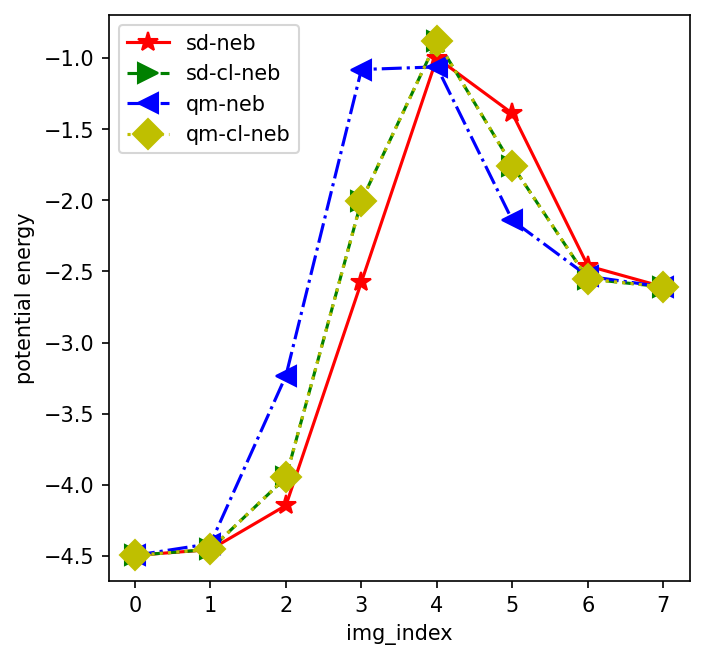

<Figure size 432x288 with 0 Axes>

In [13]:
def pltEnergyCurve(Img_seq1, Img_seq2, Img_seq3, Img_seq4, filename):
    img_count = Img_seq1.shape[0]
    ls_x = []
    ls_y1 = []
    ls_y2 = []
    ls_y3 = []
    ls_y4 = []
    for i in range(img_count):
        ls_x.append(i)
        temp_y1 = LEPSHarmOsciPot(Img_seq1[i][0], Img_seq1[i][1])
        ls_y1.append(temp_y1)
        temp_y2 = LEPSHarmOsciPot(Img_seq2[i][0], Img_seq2[i][1])
        ls_y2.append(temp_y2)
        temp_y3 = LEPSHarmOsciPot(Img_seq3[i][0], Img_seq3[i][1])
        ls_y3.append(temp_y3)
        temp_y4 = LEPSHarmOsciPot(Img_seq4[i][0], Img_seq4[i][1])
        ls_y4.append(temp_y4)
    plt.figure(figsize=(5,5), dpi=150)
    plt.xlabel("img_index")
    plt.ylabel("potential energy")
    plt.plot(ls_x, ls_y1, marker="*", linestyle='-', color='r', ms=10, label="sd-neb")
    plt.plot(ls_x, ls_y2, marker=">", linestyle='--', color='g', ms=10, label="sd-cl-neb")
    plt.plot(ls_x, ls_y3, marker="<", linestyle='-.', color='b', ms=10, label="qm-neb")
    plt.plot(ls_x, ls_y4, marker="D", linestyle=':', color='y', ms=10, label="qm-cl-neb")
    plt.legend()
    plt.show()
    plt.savefig(filename)

pltEnergyCurve(img_sd_neb, img_sd_clneb, img_qm_neb, img_qm_clneb, "energy-curve.png")